In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',50)
pd.set_option('display.width',100)

In [34]:
df = pd.read_csv(r'C:\Users\yezhu\dsi\team_project\data\raw\new_retail_data.csv')
# Select columns I need
df = df[['Transaction_ID','Customer_ID','City', 'State','Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products']]
df.shape

(302010, 25)

In [35]:
# Drop null rows
df_cleaned = df.dropna()
df_cleaned.shape

(295617, 25)

In [36]:
# Data type conversions
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], format='%m/%d/%Y')
# Create a new column to store yearmonth as integer
#df_cleaned['yearmonth'] = df_cleaned['Date'].dt.strftime('%Y%m').astype(int)
df_cleaned

,Transaction_ID,Customer_ID,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Dortmund,Berlin,Germany,21.0,Male,Low,Regular,2023-09-18,2023.0,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Nottingham,England,UK,19.0,Female,Low,Premium,2023-12-31,2023.0,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Geelong,New South Wales,Australia,48.0,Male,Low,Regular,2023-04-26,2023.0,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Edmonton,Ontario,Canada,56.0,Male,High,Premium,2023-05-08,2023.0,May,14:55:17,7.0,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Bristol,England,UK,22.0,Male,Low,Premium,2024-01-10,2024.0,January,16:54:07,2.0,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302005,4246475.0,12104.0,Townsville,New South Wales,Australia,31.0,Male,Medium,Regular,2024-01-20,2024.0,January,23:40:29,5.0,194.792597,973.962984,Books,Penguin Books,Fiction,Bad,Same-Day,Cash,Processing,1.0,Historical fiction
302006,1197603.0,69772.0,Hanover,Berlin,Germany,35.0,Female,Low,New,2023-12-28,2023.0,December,2:55:45,1.0,285.137301,285.137301,Electronics,Apple,Laptop,Excellent,Same-Day,Cash,Processing,5.0,LG Gram
302007,7743242.0,28449.0,Brighton,England,UK,41.0,Male,Low,Premium,2024-02-27,2024.0,February,2:43:49,3.0,60.701761,182.105285,Clothing,Adidas,Jacket,Average,Express,Cash,Shipped,2.0,Parka
302008,9301950.0,45477.0,Halifax,Ontario,Canada,41.0,Male,Medium,New,2023-09-03,2023.0,September,11:20:31,1.0,120.834784,120.834784,Home Decor,IKEA,Furniture,Good,Standard,Cash,Shipped,4.0,TV stand


In [37]:

# Extract year and month for further analysis
df_cleaned['year'] = df_cleaned['Date'].dt.year
df_cleaned['month'] = df_cleaned['Date'].dt.month

# Aggregate transaction value by month
monthly_data = df_cleaned.groupby(['year', 'month'])['Total_Amount'].sum().reset_index()

# Create a 'date' column for easier plotting
monthly_data['date'] = pd.to_datetime(monthly_data[['year', 'month']].assign(day=1))

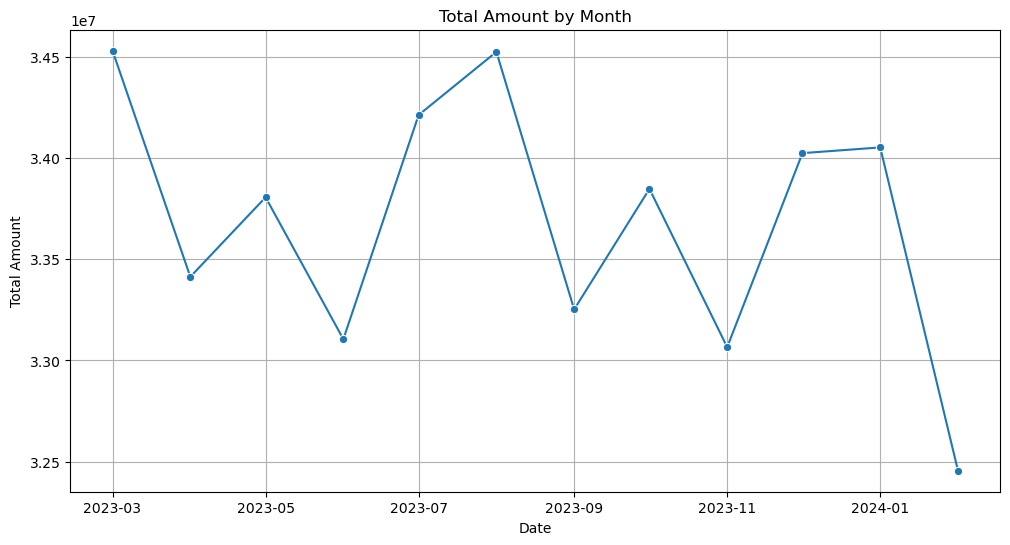

In [38]:
# Plot the overall transaction value by month
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='Total_Amount', data=monthly_data, marker='o')
plt.title('Total Amount by Month')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

Mean Squared Error: 738541.2182765984
R-squared: 0.42180663819634767


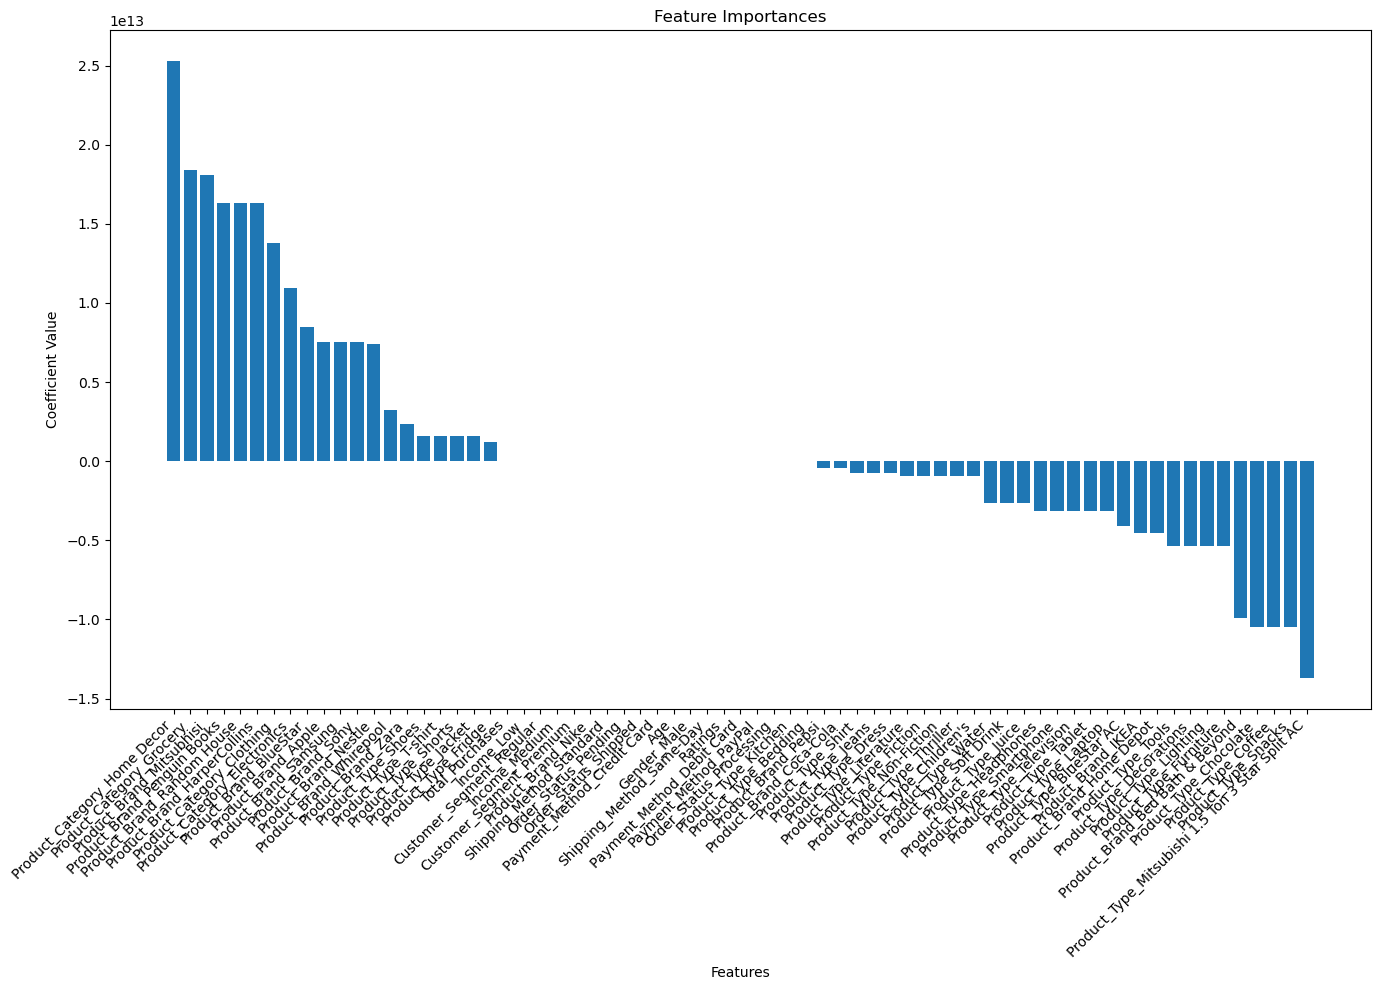

In [39]:
# Select features for the regression model
features = ['Age', 'Gender', 'Income', 'Customer_Segment', 'Total_Purchases',
            'Product_Category', 'Product_Brand', 'Product_Type', 'Shipping_Method',
            'Payment_Method', 'Order_Status', 'Ratings']

# Convert categorical variables into dummy/indicator variables
df_model = pd.get_dummies(df_cleaned[features], drop_first=True)
target = df['Total_Amount']

# Check for and drop missing values
df_model = df_model.dropna()
target = target[df_model.index]

# Ensure the shapes of X and y match
assert df_model.shape[0] == target.shape[0], "Mismatch in the number of samples between features and target"

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_model, target, test_size=0.3, random_state=42)

# Training the regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Making predictions
y_pred = regressor.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Identifying key drivers impacting sales
coefficients = pd.DataFrame(regressor.coef_, X_train.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Plotting the coefficients
plt.figure(figsize=(14, 10))
plt.bar(coefficients.index, coefficients['Coefficient'])
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensures all labels fit within the plot area
plt.show()


In [61]:
top_n_features = 5  # Example: Choose the top 5 features

# Selecting top N features based on absolute coefficient values
top_features = coefficients.iloc[:top_n_features].index.tolist()

print(f"Top {top_n_features} features impacting Total Amount:")
print(top_features)


Top 5 features impacting Total Amount:
['Product_Category_Home Decor', 'Product_Category_Grocery', 'Product_Brand_Mitsubhisi', 'Product_Brand_Penguin Books', 'Product_Brand_Random House']


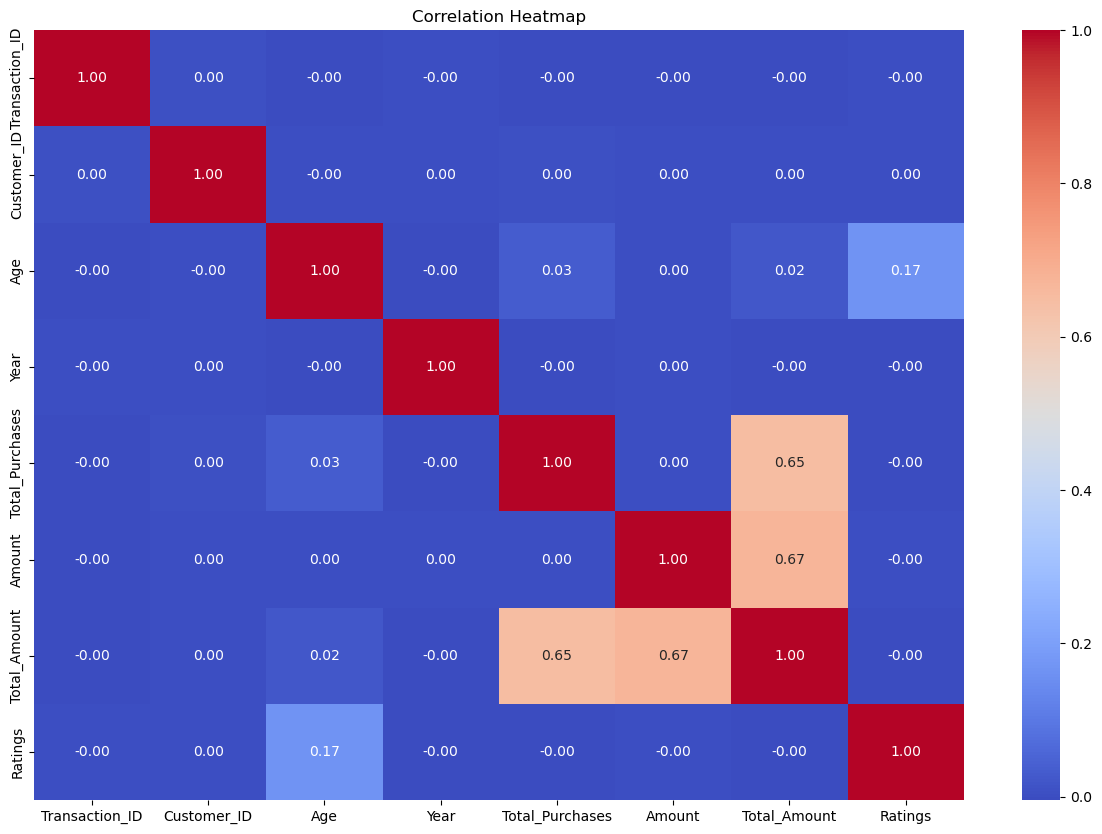

In [26]:
# Plotting correlation heatmap
plt.figure(figsize=(15, 10))
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()